# Importing libraries

In [1]:
#System
import os 

#Data Transformation and Modelling
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import datetime as dt
import time

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format = 'png'

# Reading the dataset

In [5]:
os.chdir(r'C:\Users\TrendingPC\Desktop\IronHAck\LABS\Proyect-Kaggle\data')
data = pd.read_csv('data.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
validation = pd.read_csv('validation.csv')

# EDA

In [7]:
data.isna().sum().sort_values(ascending = False)

# There aren't NaN values

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
 Retained Earnings to Total Assets                          0
                                                           ..
 Total Asset Growth Rate                                    0
 Continuous Net Profit Growth Rate                          0
 Regular Net Profit Growth Rate                             0
 After-tax Net Profit Growth Rate                           0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

### Converting all the columns to snake_case

In [78]:
train.columns = [x.lower() for x in train.columns]
train.columns = train.columns.str.replace("[ ]", "_", regex=True)

test.columns = [x.lower() for x in test.columns]
test.columns = test.columns.str.replace("[ ]", "_", regex=True)

validation.columns = [x.lower() for x in validation.columns]
validation.columns = validation.columns.str.replace("[ ]", "_", regex=True)

In [35]:
data['bankrupt?'].value_counts()

0    6599
1     220
Name: bankrupt?, dtype: int64

### Taking a look to the most correlated values

In [34]:
corr_matrix = train.corr()
corr_matrix["bankrupt?"].sort_values(ascending=False).head(6)

bankrupt?                       1.000000
_debt_ratio_%                   0.233213
_borrowing_dependency           0.208020
_current_liability_to_assets    0.198814
_liability_to_equity            0.198322
_total_expense/assets           0.182215
Name: bankrupt?, dtype: float64

In [36]:
corr_matrix["bankrupt?"].sort_values(ascending=False).tail(5)

_retained_earnings_to_total_assets                   -0.272468
_roa(b)_before_interest_and_depreciation_after_tax   -0.284588
_roa(a)_before_interest_and_%_after_tax              -0.297661
_net_income_to_total_assets                          -0.346224
_net_income_flag                                           NaN
Name: bankrupt?, dtype: float64

### Feature selection

In [37]:
explanative_values = ['_debt_ratio_%', '_borrowing_dependency', '_current_liability_to_assets',
                     '_liability_to_equity','_total_expense/assets', '_retained_earnings_to_total_assets',
                     '_roa(b)_before_interest_and_depreciation_after_tax','_roa(a)_before_interest_and_%_after_tax',
                     '_net_income_to_total_assets']

# X an y

In [69]:
X = train[explanative_values]
y = train['bankrupt?']

In [70]:
y.value_counts()/len(y) # target variablñe is very imbalanced

0    0.969936
1    0.030064
Name: bankrupt?, dtype: float64

## RFE Decision Tree

## Model Selection

In [128]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [76]:
model1 = LGBMClassifier()
model2 = GradientBoostingClassifier()
model3 = DecisionTreeClassifier()
model4 = AdaBoostClassifier()

In [79]:
X_train = X.copy()
X_test = test[explanative_values]
y_train = y.copy()
y_test = test['bankrupt?']

In [129]:
def model_inplace(model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    fone_half = fbeta_score(y_test, y_pred, average='macro', beta=0.5) # Average Macro
    fone = fbeta_score(y_test, y_pred, average='macro', beta=1) # Average Macro
    ftwo = fbeta_score(y_test, y_pred, average='macro', beta=2) # Average Macro
   
    classification = classification_report(y_test,y_pred)
    
    #Confusion Matrix
    _ , ax = plt.subplots()
    ax.set(title="Confusion Matrix on Test set")
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax)
    
    print(f'F_One {fone} \n')
    print(f'F_Half {fone_half} \n')
    print(f'F_Two {ftwo} \n')
    print (classification)
   

F_One 0.6283551110901457 

F_Half 0.66835273449322 

F_Two 0.6049503484961899 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2170
           1       0.46      0.20      0.28        81

    accuracy                           0.96      2251
   macro avg       0.71      0.59      0.63      2251
weighted avg       0.95      0.96      0.96      2251



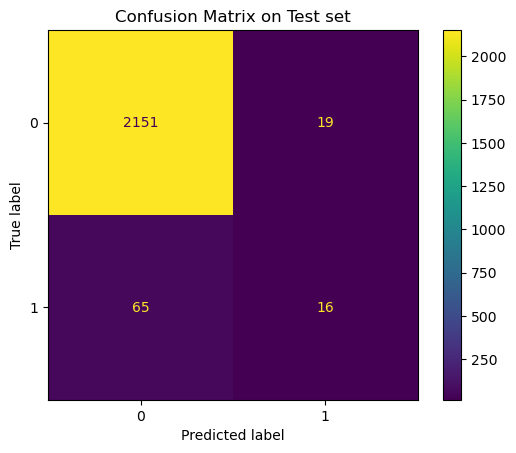

In [130]:
model_inplace(model1) #LGBMClassifier()

F_One 0.6404153354632588 

F_Half 0.6774845994241874 

F_Two 0.6172188701693259 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2170
           1       0.46      0.22      0.30        81

    accuracy                           0.96      2251
   macro avg       0.72      0.61      0.64      2251
weighted avg       0.95      0.96      0.96      2251



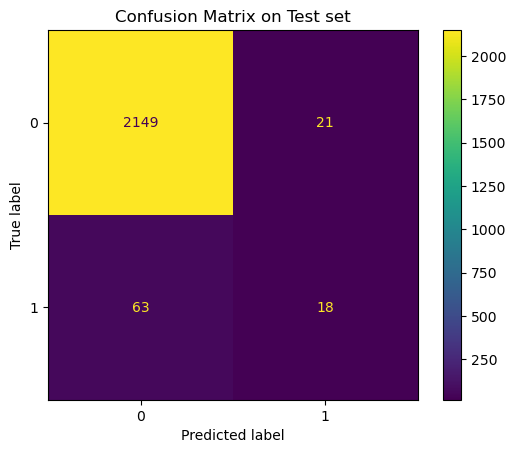

In [131]:
model_inplace(model2) # GradientBoostingClassifier()

F_One 0.6467182367936974 

F_Half 0.6462006206472748 

F_Two 0.647240194210994 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2170
           1       0.32      0.32      0.32        81

    accuracy                           0.95      2251
   macro avg       0.65      0.65      0.65      2251
weighted avg       0.95      0.95      0.95      2251



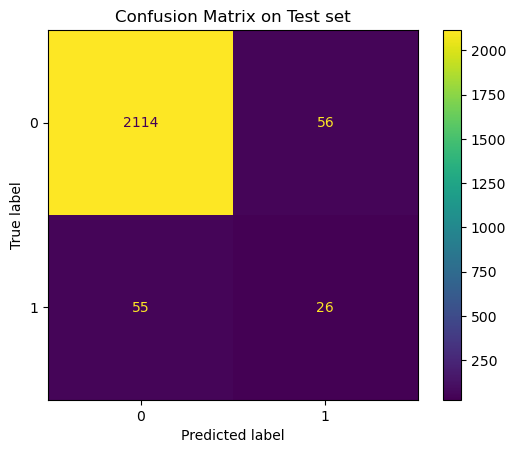

In [132]:
model_inplace(model3) #DecisionTreeClassifier()

F_One 0.6106577354277718 

F_Half 0.6452751552789936 

F_Two 0.5905638879003922 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2170
           1       0.40      0.17      0.24        81

    accuracy                           0.96      2251
   macro avg       0.68      0.58      0.61      2251
weighted avg       0.95      0.96      0.95      2251



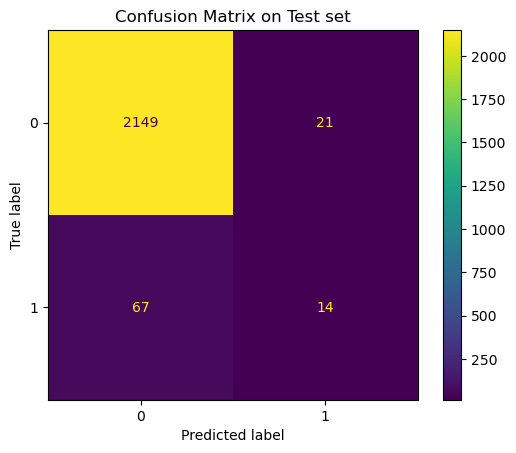

In [133]:
model_inplace(model4) #AdaBoostClassifier() 

# First correction imbalance: oversampling

# SMOTE method

In [109]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=3)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [110]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(3426, 9)
(6646, 9)


In [111]:
y_train.value_counts()/len(y_train)

0    0.969936
1    0.030064
Name: bankrupt?, dtype: float64

In [112]:
y_train_SMOTE.value_counts()/len(y_train_SMOTE)

0    0.5
1    0.5
Name: bankrupt?, dtype: float64

In [125]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [126]:
def model_inplace_SMOTE(model):
    
    model.fit(X_train_SMOTE, y_train_SMOTE)
    y_pred = model.predict(X_test)
    
    fone_half = fbeta_score(y_test, y_pred, average='macro', beta=0.5) # Average Macro
    fone = fbeta_score(y_test, y_pred, average='macro', beta=1) # Average Macro
    ftwo = fbeta_score(y_test, y_pred, average='macro', beta=2) # Average Macro
    
    #plt.savefig(f'viz/confusion_Matrix{str(model)[:40]}.png')
    classification = classification_report(y_test,y_pred)
    
    #Confusion Matrix
    _ , ax = plt.subplots()
    ax.set(title="Confusion Matrix on Test set")
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax)
    
    print(f'F_One {fone} \n')
    print(f'F_Half {fone_half} \n')
    print(f'F_Two {ftwo} \n')
    print (classification)
   

F_One 0.6653419429281499 

F_Half 0.6467908284777865 

F_Two 0.6908739204129069 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2170
           1       0.29      0.47      0.36        81

    accuracy                           0.94      2251
   macro avg       0.64      0.71      0.67      2251
weighted avg       0.96      0.94      0.95      2251



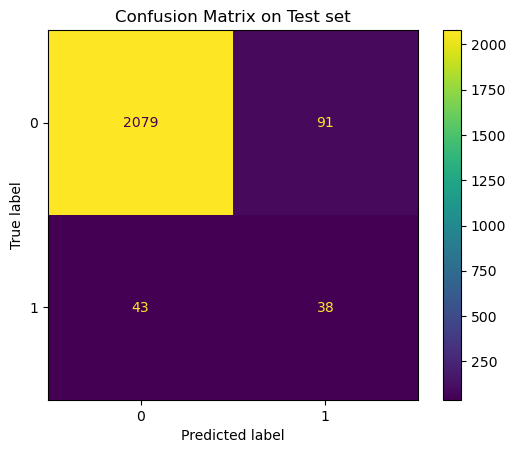

In [127]:
model_inplace_SMOTE(model1) #AdaBoostClassifier()

F_One 0.6441427465442146 

F_Half 0.6162683778184007 

F_Two 0.7061084510872435 

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2170
           1       0.23      0.68      0.34        81

    accuracy                           0.90      2251
   macro avg       0.61      0.80      0.64      2251
weighted avg       0.96      0.90      0.93      2251



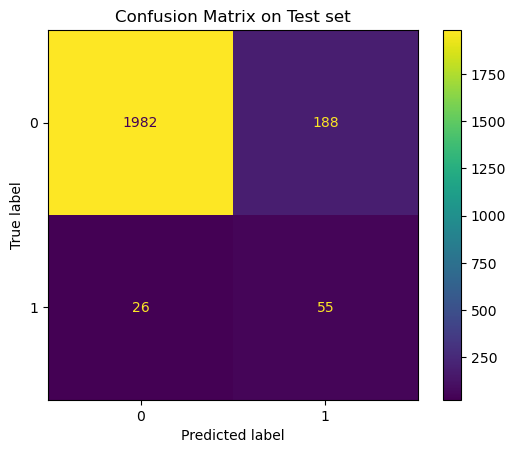

In [134]:
model_inplace_SMOTE(model2)  #DecisionTreeClassifier()

F_One 0.5890068362277611 

F_Half 0.5780397050948407 

F_Two 0.6056367047344885 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2170
           1       0.17      0.30      0.22        81

    accuracy                           0.92      2251
   macro avg       0.57      0.62      0.59      2251
weighted avg       0.94      0.92      0.93      2251



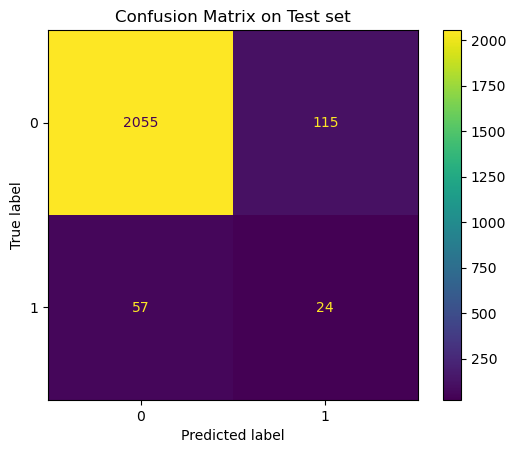

In [135]:
model_inplace_SMOTE(model3) # GradientBoostingClassifier()

F_One 0.6226663601444486 

F_Half 0.5984160026573507 

F_Two 0.6953702222909827 

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2170
           1       0.20      0.79      0.31        81

    accuracy                           0.88      2251
   macro avg       0.59      0.83      0.62      2251
weighted avg       0.96      0.88      0.91      2251



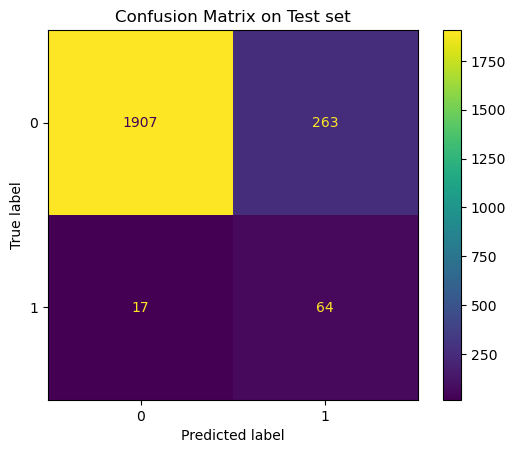

In [136]:
model_inplace_SMOTE(model4)  #LGBMClassifier()